# Actions

In [99]:
from gofi.actions.model import ActionModel, Group
 
n = 50
Dn = Group(generators="rs", relations=["r"*n, "rsrs", "ss"])


In [100]:
from gofi.plot.colors import blueorange

In [101]:
model = ActionModel(Dn, n)

In [102]:
import matplotlib.pyplot as plt
def plot_model(model, title : str):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    imr = axs[0].imshow(model.P("r").clone().detach(), cmap=blueorange)#"hot")
    axs[0].set_title(title +" r")


    ims = axs[1].imshow(model.P("s").clone().detach(),cmap=blueorange)#"hot")
    axs[1].set_title(title +" s")

    plt.tight_layout()
    fig.colorbar(ims, ax=axs, orientation='vertical', fraction=0.046, pad=0.04)
    plt.show()

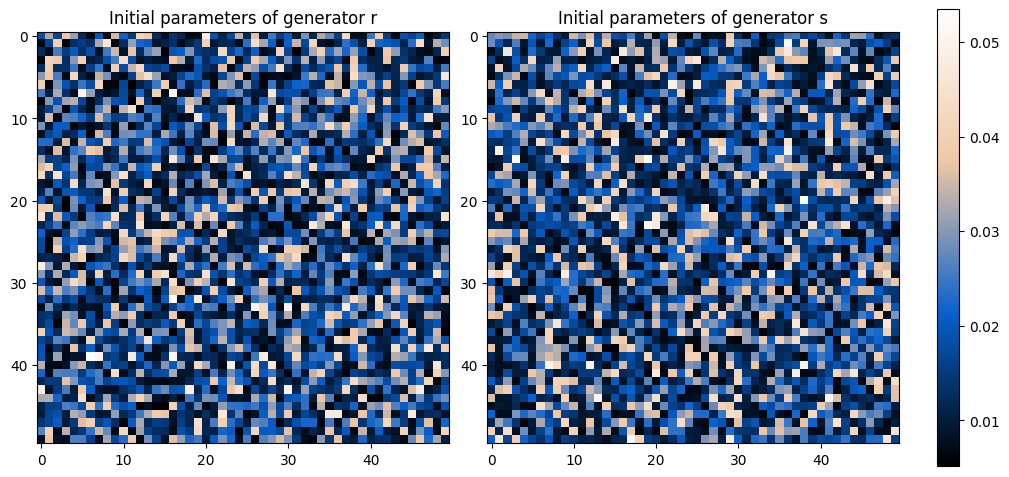

Step 1. Loss= 244.02972412109375, |grad| = 0.19137135103903558
Step 201. Loss= 157.32057189941406, |grad| = 8.68517622743731
Step 401. Loss= 85.5482177734375, |grad| = 1.8634450748835008
Step 601. Loss= 53.91969680786133, |grad| = 1.2312161086501483
Step 801. Loss= 48.17524337768555, |grad| = 0.7373773401039729
Step 1001. Loss= 40.954071044921875, |grad| = 0.03430389850135557
Step 1201. Loss= 39.15126419067383, |grad| = 0.011053243249109501
Step 1401. Loss= 37.11952209472656, |grad| = 0.006980931691473735
Step 1601. Loss= 36.62834930419922, |grad| = 0.030420583630955955
Step 1801. Loss= 36.337066650390625, |grad| = 0.002043658259350628
Step 2001. Loss= 36.25760269165039, |grad| = 0.0010718415268291814


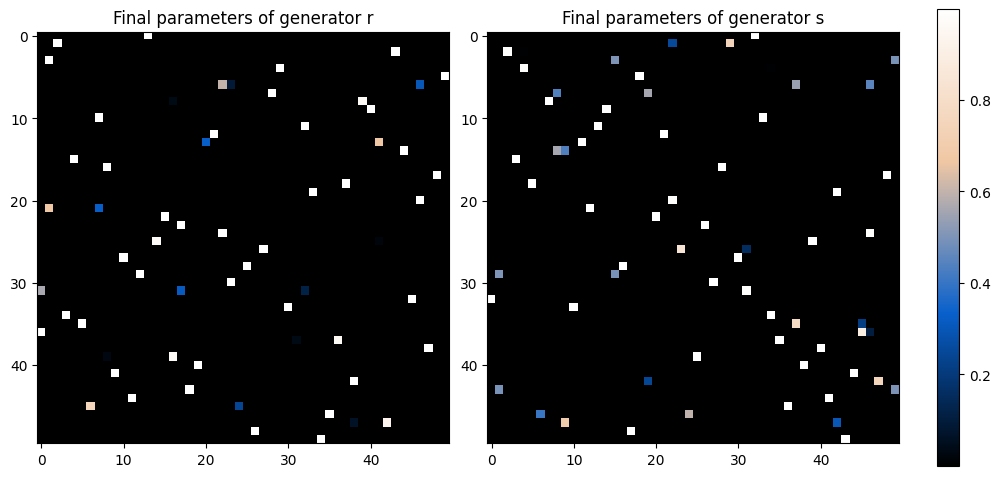

In [103]:
from gofi.actions.opt import training

plot_model(model, "Initial parameters of generator")
training(model, max_steps=100000, verbose=200, adam_parameters={"lr" : 0.01})
plot_model(model, "Final parameters of generator")

In [104]:
from gofi.actions.loss import relation_loss, bijective_loss

r = model.rm["r"]
s = model.rm["s"]

r.im_size()

47

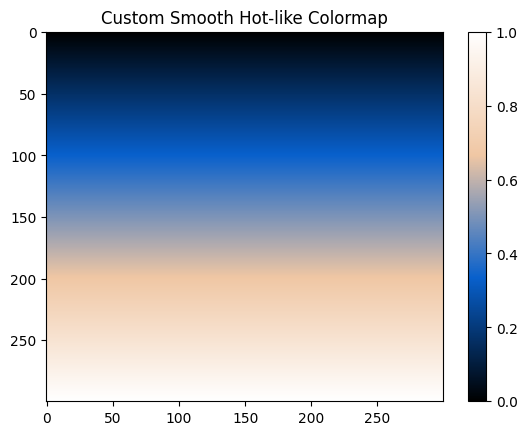

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define normalized RGB colors
black  = (0.0, 0.0, 0.0)
blue   =  (8 / 255, 80 / 255, 160 / 255)
blue   = (8 / 255, 96 / 255, 204 / 255)
lightorange = (240/ 255, 199/ 255, 164/ 255)
orange = (243 / 255, 111 / 255, 33 / 255)
green =(0, 1, 159 / 255)
yellow = (1.0, 1.0, 0.5)
white  = (1.0, 1.0, 1.0)

# Create smooth colormap from black → blue → orange → yellow → white
custom_hot = LinearSegmentedColormap.from_list(
    "custom_hot",
    [black, blue, lightorange, white],
    N=512  # More steps = smoother gradient
)

# Test it with a simple gradient image
A = np.outer(np.linspace(0, 1, 300), np.ones(300))

plt.imshow(A, cmap=custom_hot, aspect='auto')
plt.colorbar()
plt.title("Custom Smooth Hot-like Colormap")
plt.show()